In [1]:
import pandas as pd
import statsmodels.api as sm 
import sklearn as sk
import seaborn as sns
import pyreadstat as prs 
import matplotlib.pyplot  as plt
import numpy as np
import os
from openai import OpenAI
from dotenv import load_dotenv

In [52]:
load_dotenv()

api_key = os.getenv("finance_api")

api_key

'JMZYJ89A8BJN1I6X'

In [28]:
import requests

from_ = "2025-02-25"
to_ = "2025-03-04"
query = "kenya"

url = f"https://newsapi.org/v2/everything?q={query}&from={from_}&to={to_}&sortBy=popularity&apiKey={api_key}"

resp = requests.get(url)

resp = resp.json()

title,author,content = [],[],[]

print(resp)

for articles in resp["articles"]:
    
    content.append(articles["content"])
    title.append(articles["title"])
    author.append(articles["author"])
    
    
news_df = pd.DataFrame({"title":title,"author":author,"content":content})


news_df
    

    
    

{'status': 'ok', 'totalResults': 542, 'articles': [{'source': {'id': None, 'name': 'NPR'}, 'author': 'Jonathan Lambert', 'title': 'Can Faith Kipyegon break four minutes in the mile? Scientists say yes.', 'description': 'Faith Kipyegon, the fastest female miler in the world, could dip under 4 minutes with an extra boost from pacers.', 'url': 'https://www.npr.org/2025/03/01/nx-s1-5313453/can-faith-kipyegon-break-four-minutes-in-the-mile-scientists-say-yes', 'urlToImage': 'https://npr.brightspotcdn.com/dims3/default/strip/false/crop/1024x576+0+54/resize/1400/quality/100/format/jpeg/?url=http%3A%2F%2Fnpr-brightspot.s3.amazonaws.com%2F56%2Ffb%2F72e5d06d47259d11382c838e5e5f%2Fgettyimages-2166219283.jpg', 'publishedAt': '2025-03-01T12:00:00Z', 'content': "Faith Kipyegon is really, really fast.\r\nIn 2023, the Kenyan middle-distance runner set three women's world records, including running a blistering 4:07 for the mile, breaking the previous record by f… [+5159 chars]"}, {'source': {'id': 'bu

,title,author,content
0,Can Faith Kipyegon break four minutes in the m...,Jonathan Lambert,"Faith Kipyegon is really, really fast.\r\nIn 2..."
1,Luxury safaris are booming — and big hotel bra...,Brittany Chang,Marriott plans to open Ritz-Carlton and JW Mar...
2,"As Warming Climate Hammers Coffee Crops, This ...",Sam Mednick / AP,"NZARA COUNTY, South Sudan Catherine Bashiama r..."
3,BBC Komla Dumor Award 2025 launched,None,The BBC is seeking a rising star of African jo...
4,Stone Soup AI (2024),None,by Alison Gopnik\r\n (UC Berkeley)\r\nFor some...
...,...,...,...
89,20 Breathtaking Shots From The 2024 Nature inF...,Saumya Ratan,"Every year, the Nature inFocus Photography Con..."
90,"Disney Menu Updates: Teppan Edo, Beaches and C...",Robin Burks,"Another week has passed in Disney World, which..."
91,Does the global carbon offset sector need an o...,Daniel Plafker,The Northern Kenya Rangelands Carbon Project (...
92,Mounting pressure for wealth tax on Africa's s...,David Ehl,While all governments battle to find funds for...


In [41]:
import requests
import json


symbol = "MSFT"
min = "5"


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={min}min&apikey={api_key}'
r = requests.get(url)
data = r.json()


with open("stocks_data.json","w") as jf: 
    
    json.dump(data["Time Series (5min)"],jf)
    
    

In [42]:
stocks_df = pd.read_json("stocks_data.json")

stocks_df

,2025-03-04 16:10:00,2025-03-04 16:05:00,2025-03-04 16:00:00,2025-03-04 15:55:00,2025-03-04 15:50:00,2025-03-04 15:45:00,2025-03-04 15:40:00,2025-03-04 15:35:00,2025-03-04 15:30:00,2025-03-04 15:25:00,...,2025-03-04 08:40:00,2025-03-04 08:35:00,2025-03-04 08:30:00,2025-03-04 08:25:00,2025-03-04 08:20:00,2025-03-04 08:15:00,2025-03-04 08:10:00,2025-03-04 08:05:00,2025-03-04 08:00:00,2025-03-04 07:55:00
1. open,389.530,389.01,3.886210e+02,388.01,389.00,390.28,389.93,390.400,391.8500,392.105,...,382.605,382.5000,382.20,382.07,382.38,382.76,382.80,382.63,383.340,383.30
2. high,390.880,390.00,3.904000e+02,388.97,389.00,390.85,390.66,390.800,392.0265,392.364,...,383.000,382.7700,382.76,382.50,383.20,388.49,383.00,383.51,390.500,383.72
3. low,388.852,388.61,3.880100e+02,387.58,387.08,389.18,389.20,389.960,390.0900,391.760,...,382.420,382.2527,382.00,382.00,382.00,382.20,382.08,382.61,381.999,383.23
4. close,390.450,389.60,3.892000e+02,388.72,388.11,389.19,390.24,389.995,390.4100,391.900,...,382.890,382.6300,382.53,382.21,382.28,382.20,382.74,382.84,382.960,383.23
5. volume,2138.000,12277.00,1.141313e+07,810178.00,414713.00,140921.00,136475.00,152103.000,182436.0000,136564.000,...,11402.000,20901.0000,38943.00,22997.00,24259.00,13591.00,12986.00,11410.00,63914.000,6337.00


In [43]:
stocks_df.transpose()

,1. open,2. high,3. low,4. close,5. volume
2025-03-04 16:10:00,389.530,390.88,388.852,390.45,2138.0
2025-03-04 16:05:00,389.010,390.00,388.610,389.60,12277.0
2025-03-04 16:00:00,388.621,390.40,388.010,389.20,11413127.0
2025-03-04 15:55:00,388.010,388.97,387.580,388.72,810178.0
2025-03-04 15:50:00,389.000,389.00,387.080,388.11,414713.0
...,...,...,...,...,...
2025-03-04 08:15:00,382.760,388.49,382.200,382.20,13591.0
2025-03-04 08:10:00,382.800,383.00,382.080,382.74,12986.0
2025-03-04 08:05:00,382.630,383.51,382.610,382.84,11410.0
2025-03-04 08:00:00,383.340,390.50,381.999,382.96,63914.0


In [ ]:
url = "https://newsapi.org/v2/everything?q=apple&from=2025-03-04&to=2025-03-04&sortBy=popularity&apiKey=dab5b23bce8640be9781df2a8559f272"

In [49]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

completion = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello!"}
  ]
)

completion

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-*******************************************************************************************************************************************************z0OM. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [50]:
url = "https://api.openai.com/v1/chat/completions"

headers = {
    
    'Authorization':'Bearer '+api_key,
    'Content-Type': 'ápplication/json'
}

resp = requests.get(url,headers=headers)

resp

<Response [401]>

In [2]:
path = r'C:\Users\EliteBook 800 G4\Videos\DataProjects\Data_Project\Data'

file_names = [ file for file in os.listdir(path)]


file_names

['AECF.sav',
 'All Appliances.csv',
 'All Home and Kitchen.csv',
 'Baby Bath Skin and Grooming.csv',
 'credit.csv',
 'credit.xlsx',
 'facebook.csv',
 'main.sav',
 'NAMS.sav',
 'Shake1.sav',
 '~$credit.xlsx']

In [ ]:
df = pd.read_spss(os.path.join(path, file_names[-1]))


rename_cols = {}

for cols in df.columns: 
    
    rename_cols[cols] = cols.replace("@","LL")
    
rename_cols

ReadstatError: Invalid file, or file has unsupported features

In [8]:
df.rename(columns=rename_cols,inplace=True)
df

,Respondent_Serial,Respondent_Serial_SourceFile,Respondent_Origin1,Respondent_Origin2,Respondent_Origin3,Respondent_Origin4,Respondent_Origin5,Respondent_Origin6,Respondent_Origin_Other,Respondent_ID,...,L42,L43_1_L43,L43_2_L43,L43_3_L43,L43_4_L43,SHELL_COMP_MODE,SHELL_IP_ADDRESS,LLBHP,LLPAQ,FUP_SUP
0,593486.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Somewhat not worth it,268.0,239.0,130.0,854.0,F2F,,NaN,NaN,No
1,593487.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Average worth,69.0,959.0,392.0,848.0,F2F,,NaN,NaN,Yes
2,593488.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Completely worth it,56.0,765.0,266.0,935.0,F2F,,NaN,NaN,Yes
3,593489.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Somewhat not worth it,195.0,373.0,110.0,583.0,F2F,,NaN,NaN,No
4,593490.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Somewhat not worth it,812.0,546.0,734.0,471.0,F2F,,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,593981.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Completely worth it,920.0,992.0,779.0,297.0,F2F,,NaN,NaN,Yes
496,593982.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Somewhat worth it,330.0,864.0,998.0,423.0,F2F,,NaN,NaN,Yes
497,593983.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Somewhat not worth it,500.0,991.0,285.0,916.0,F2F,,NaN,NaN,No
498,593984.0,,NaN,NaN,NaN,NaN,NaN,NaN,,,...,Somewhat not worth it,318.0,473.0,655.0,835.0,F2F,,NaN,NaN,Yes


In [9]:
prs.write_sav(df,"AECF.sav")

In [4]:
file = file_names

full_path = os.path.join(path, file[4])

df = pd.read_csv(full_path)

df.head()

,Loan Purpose,Checking,Savings,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Years,Job,Credit Risk
0,Small Appliance,$0,$739,13,12,M,Single,23,Own,3,Unskilled,Low
1,Furniture,$0,"$1,230",25,0,M,Divorced,32,Own,1,Skilled,High
2,New Car,$0,$389,19,119,M,Single,38,Own,4,Management,High
3,Furniture,$638,$347,13,14,M,Single,36,Own,2,Unskilled,High
4,Education,$963,"$4,754",40,45,M,Single,31,Rent,3,Skilled,Low


In [ ]:
low_male = df[(df["Credit Risk"]=="Low") & (df["Gender"]=="M")]["Credit Risk"].count()
low_female = df[(df["Credit Risk"]=="Low") & (df["Gender"]=="F")]["Credit Risk"].count()

high_female = df[(df["Credit Risk"]=="High") & (df["Gender"]=="F")]["Credit Risk"].count()
high_male = df[(df["Credit Risk"]=="High") & (df["Gender"]=="M")]["Credit Risk"].count()

ratio_female = high_female/low_female-1 
ratio_male = high_male/low_male-1



np.float64(-0.014018691588784993)

In [110]:

def cross_tab(df,by_col):

    new_df = df.pivot_table(
        
        index = by_col,
        values = df.columns ,
        aggfunc= "count"
    )

    of_ = pd.crosstab(df[by_col],df[by_col])
    of_.index.name = None
    new_df = pd.concat([of_ ,new_df],axis=1)
    
    return new_df

In [111]:
new_df = cross_tab(df,"gender")
new_df

,female,male,age,dob_day,dob_month,dob_year,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,tenure,userid,www_likes,www_likes_received
female,40254,0,40254,40254,40254,40254,40254,40254,40254,40254,40254,40254,40252,40254,40254,40254
male,0,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574,58574


In [112]:
actual_columns  = new_df.columns 

how_many_banners_to_add = int(input("How Many Banners?"))

name_banners = input("Name the "+str(how_many_banners_to_add)+ "sep by ,").split(",")

cols_range  = []

for i in range(3):

    first_from = input(str(i)+" Banner From column - column: del - ")
    
    cols_range.append(first_from)

cols_range




['female-dob_year',
 'friend_count-mobile_likes_received',
 'tenure-www_likes_received']

In [113]:


def gen_cols(first_from,names):
    
    first_from_index = [i for i in range(0,len(actual_columns)) if actual_columns[i] == first_from[0] or actual_columns[i] == first_from[1]]
    
    print(first_from)

    generate_cols  = [names if i==first_from_index[0] else "" for i in range(first_from_index[0],first_from_index[1]+1)]


    return  generate_cols
        
        
new_cols = []
    
for i in range(len(cols_range)): 
    
    
    new_cols+=gen_cols(cols_range[i].split("-"),name_banners[i])
    
    

actual_columns

['female', 'dob_year']
['friend_count', 'mobile_likes_received']
['tenure', 'www_likes_received']


Index(['female', 'male', 'age', 'dob_day', 'dob_month', 'dob_year',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'tenure', 'userid',
       'www_likes', 'www_likes_received'],
      dtype='object')

In [114]:
new_cols

['Personal',
 '',
 '',
 '',
 '',
 '',
 'metrics',
 '',
 '',
 '',
 '',
 '',
 'others',
 '',
 '',
 '']

In [115]:
new_df.columns = pd.MultiIndex.from_tuples(
    zip(new_cols, 
        new_df.columns))
new_df.fillna(0)

Personal                                               metrics  \
         female   male    age dob_day dob_month dob_year friend_count   
female    40254      0  40254   40254     40254    40254        40254   
male          0  58574  58574   58574     58574    58574        58574   

                                                                 \
       friendships_initiated  likes likes_received mobile_likes   
female                 40254  40254          40254        40254   
male                   58574  58574          58574        58574   

                             others                                      
       mobile_likes_received tenure userid www_likes www_likes_received  
female                 40254  40252  40254     40254              40254  
male                   58574  58574  58574     58574              58574

In [119]:
import openpyxl

file_name = "freq_data.xlsx" 


new_df.to_excel(file_name,startcol=5,startrow=5)

In [ ]:
path = os.path.join(os.getcwd(),file_name)

wb = openpyxl.load_workbook(path)

wb = wb.active 

ws.merge

In [7]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


## Data Cleaning


### 1. Checking Nullity


In [8]:
df["age"].isnull().sum()

np.int64(0)

In [9]:
def null_summary(col):
    
    return df[col].isnull().sum()

In [10]:
def drop_null(col): 
    
    df.dropna(subset=[col], inplace=True)
    
    print("Number of Null Values -> "+str(null_summary(col)))
    
    return df 


drop_null("age")


Number of Null Values -> 0


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


### 3. Removing Duplicates

In [11]:
def drop_dups(col): 
    
    df.drop_duplicates(subset=[col], inplace=True)
    
    return df     

drop_dups("age")


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
23,1708962,15,17,1998,11,male,98.0,0,0,0,0,0,0,0,0
67,2163813,16,20,1997,11,male,20.0,0,0,0,0,0,0,0,0
112,1483131,17,2,1996,11,male,21.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,2002298,105,18,1908,11,male,1090.0,16,8,11,12,11,10,0,2
17272,2103738,99,26,1914,9,female,1345.0,20,12,12,6,12,5,0,1
23786,1539605,111,1,1902,1,female,1602.0,30,14,4,0,0,0,4,0
27126,2096188,109,16,1904,10,male,1666.0,35,16,6,23,1,8,5,15


### 4.Removing Rows & Columns

In [12]:
columns = df.columns 

remain_cols = [col for col in columns if col != "name"]

remain_cols



['userid',
 'age',
 'dob_day',
 'dob_year',
 'dob_month',
 'gender',
 'tenure',
 'friend_count',
 'friendships_initiated',
 'likes',
 'likes_received',
 'mobile_likes',
 'mobile_likes_received',
 'www_likes',
 'www_likes_received']

### 5. Filter Based on Conditions

### Cleaning Strings

- removing unwanted charecters
- removing spaces
- joining strings


In [29]:

def rem_unwanted_char(col,char_list):

    for char in char_list: 
    
         df[col] = df[col].str.replace(char,"")
         
    return df 

char_list = ["₹",","]

df = rem_unwanted_char("discount_price",char_list)
df

KeyError: 'discount_price'

In [15]:
def rem_spaces(col): 
    
    df[col] = [val.replace(" ","") for val in df[col]]
    
    return df  

df = rem_spaces("sub_category")

df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",599,"₹1,245"
1,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",199,₹545
2,Glun Multipurpose Portable Electronic Digital ...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,199,₹899
3,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",299,"₹1,999"
4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",625,"₹1,400"


In [16]:
def change_letter_case(case,col): 
    
    if case == 1: 
        
        # upper case 
        df[col] = df[col].str.upper()
        
    elif case == 2: 
        
        #lower 
        df[col] = df[col].str.lower()
        
        
    else: 
        
        #proper 
        df[col] = df[col].str.title()
        
    return df    
    
df = change_letter_case(3,"name") 

df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Pigeon By Stovekraft Amaze Plus Electric Kettl...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",599,"₹1,245"
1,Pigeon Polypropylene Mini Handy And Compact Ch...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",199,₹545
2,Glun Multipurpose Portable Electronic Digital ...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,199,₹899
3,Beatxp Kitchen Scale Multipurpose Portable Ele...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",299,"₹1,999"
4,Bajaj Dx-6 1000W Dry Iron With Advance Solepla...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",625,"₹1,400"
...,...,...,...,...,...,...,...,...,...
9571,Kaizen Swimming Pool Heavy Duty In-Ground Pool...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Swimming-Ground-Vacuum-S...,2.9,5,1850,"₹3,250"
9572,Butterfly 750 Watts 4 Jar Mixer Grinder And 90...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Butterfly-Watts-Grinder-...,4.1,33,3123,"₹6,382"
9573,Bajaj Bahar 150 Mm Exhaust Fan (Metallic Grey),appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bahar-150-Exhaust-Metall...,3.9,337,1489,"₹1,940"
9574,Drumstone Barbeque Grill Grilling Set Machine ...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Drumstone-Barbeque-Dual-...,NaN,NaN,1995,"₹3,999"


In [17]:
df["ratings"] = df["ratings"].astype(float)
df["discount_price"] = df["discount_price"].astype(float)
df["sub_category"] = df["sub_category"].apply(lambda x:x.upper() if len(x)<5 else x)

df

ValueError: could not convert string to float: 'Get'

In [18]:

df["comments"] = df["ratings"].apply(lambda x: "Good" if x == "4.1" else "bad")

df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,comments
0,Pigeon By Stovekraft Amaze Plus Electric Kettl...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",599,"₹1,245",bad
1,Pigeon Polypropylene Mini Handy And Compact Ch...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",199,₹545,Good
2,Glun Multipurpose Portable Electronic Digital ...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,199,₹899,bad
3,Beatxp Kitchen Scale Multipurpose Portable Ele...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",299,"₹1,999",bad
4,Bajaj Dx-6 1000W Dry Iron With Advance Solepla...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",625,"₹1,400",bad
...,...,...,...,...,...,...,...,...,...,...
9571,Kaizen Swimming Pool Heavy Duty In-Ground Pool...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Swimming-Ground-Vacuum-S...,2.9,5,1850,"₹3,250",bad
9572,Butterfly 750 Watts 4 Jar Mixer Grinder And 90...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Butterfly-Watts-Grinder-...,4.1,33,3123,"₹6,382",Good
9573,Bajaj Bahar 150 Mm Exhaust Fan (Metallic Grey),appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bahar-150-Exhaust-Metall...,3.9,337,1489,"₹1,940",bad
9574,Drumstone Barbeque Grill Grilling Set Machine ...,appliances,AllAppliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Drumstone-Barbeque-Dual-...,NaN,NaN,1995,"₹3,999",bad


### Creating/assigning Columns
- creating new columns based on calculations

In [19]:
x = "Fgh"
x.upper

<function str.upper()>

### Handling Outliers
- Checking for outliers
- Removing outliers
    - Interquartile method
    - z-scale method

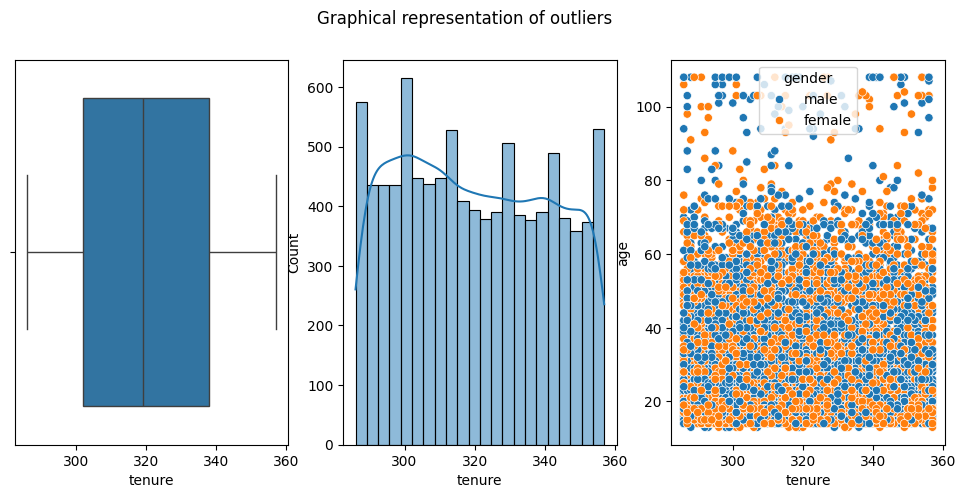

In [59]:

def display_outliers(df,x_col,y_col,z_col):
    
    fig,axes = plt.subplots(1,3,figsize=(12,5))

    fig.suptitle("Graphical representation of outliers")

    sns.boxplot(data=df,ax=axes[0],x=x_col)

    sns.histplot(data=df,x=x_col, kde=True,ax=axes[1])

    sns.scatterplot(data=df,x=x_col,y=y_col,hue=z_col,ax=axes[2])
    
    
display_outliers(df,"tenure","age","gender")



In [32]:
'''
Z = (X-x_)/(SD)
x_ = total_X/len_x 
SD = SQRT(summation(x-x_)**2/len_x-1) 
'''
class zScore:
    
    def __init__(self,df,col):
        
        self.df = df
        self.col = col 
        
    def get_len(self): 
        
        return len(self.df[self.col])
        
    def calc_mean(self):
        
        n = self.get_len()
        total_x = self.df[self.col].sum()
        x_ = total_x/n
        
        return x_
    
    def calc_SD(self):
        
        
        upper_part = 0
        
        upper_part = sum([(val-self.calc_mean())**2 for val in self.df[self.col]])
        
            
        SD = np.sqrt(upper_part/self.get_len())
        
        return SD
    
    def calc_zScore(self):
        
        z_scores = [(val-self.calc_mean())/self.calc_SD() for val in self.df[self.col]]
        
        return z_scores
        
        
        
        
z = zScore(df,"tenure") 

z.calc_zScore()
        
     

KeyboardInterrupt: 

In [76]:
# create new variable/column: z-score for specific variable

df["tenure_z_score"] = zScore(df,"tenure").calc_zScore()

df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_z_score
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,-0.390133
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0,-1.073864
23,1708962,15,17,1998,11,male,98.0,0,0,0,0,0,0,0,0,-0.842365
67,2163813,16,20,1997,11,male,20.0,0,0,0,0,0,0,0,0,-1.052330
112,1483131,17,2,1996,11,male,21.0,0,0,0,0,0,0,0,0,-1.049638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,2002298,105,18,1908,11,male,1090.0,16,8,11,12,11,10,0,2,1.827958
17272,2103738,99,26,1914,9,female,1345.0,20,12,12,6,12,5,0,1,2.514381
23786,1539605,111,1,1902,1,female,1602.0,30,14,4,0,0,0,4,0,3.206188
27126,2096188,109,16,1904,10,male,1666.0,35,16,6,23,1,8,5,15,3.378467


In [79]:
# subset dataframe based on z-score 

criteria_val = 1.5

df = df[(df["tenure_z_score"] < criteria_val) & (df["tenure_z_score"] > -criteria_val)]

df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_z_score
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,-0.390133
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0,-1.073864
23,1708962,15,17,1998,11,male,98.0,0,0,0,0,0,0,0,0,-0.842365
67,2163813,16,20,1997,11,male,20.0,0,0,0,0,0,0,0,0,-1.052330
112,1483131,17,2,1996,11,male,21.0,0,0,0,0,0,0,0,0,-1.049638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,1612165,87,6,1926,8,male,510.0,3,0,0,0,0,0,0,0,0.266680
5547,1420313,89,19,1924,6,male,492.0,3,3,3,0,3,0,0,0,0.218227
6902,1464526,91,26,1922,10,male,659.0,5,4,0,0,0,0,0,0,0.667767
7003,1329801,96,18,1917,9,female,98.0,5,2,2,1,0,0,2,1,-0.842365


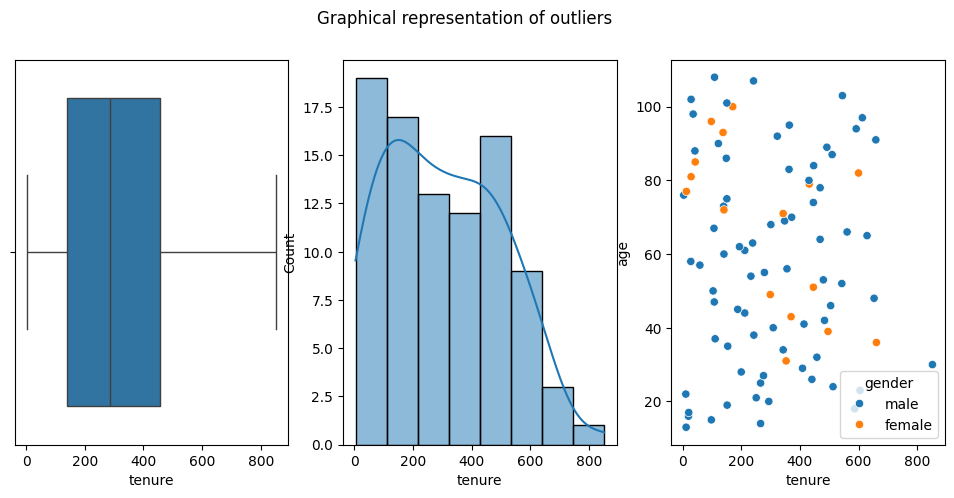

In [80]:
display_outliers(df,"tenure","age","gender")	


In [43]:
x = [1,2,3,5]

x[1:3]

[2, 3]

In [44]:
tenure_list = [val for val in df["tenure"]]
tenure_list.sort()
len(tenure_list)

lower_list = tenure_list[:len(tenure_list)//2]
len(lower_list)

median = tenure_list[len(tenure_list)//2+1]

lower_list[len(lower_list)//2:len(lower_list)//2+2]


[149.0, 151.0]

In [48]:
percentile_25  = tenure_list[len(tenure_list)//4:len(tenure_list)//4+2]
percentile_25

[149.0, 151.0]

In [71]:
x = [1,2,3,4,5,6]

x[:len(x)//2-1]

[1, 2]

In [12]:

class IQR: 
    
    def __init__(self,df,col): 
        
        self.df = df  
        self.col = col  
        
    def sort_list(self):  
        
        sorted_list = [val for val in self.df[self.col]]
        
        sorted_list.sort()
        
        return sorted_list
    
    def get_len(self,col): 
        
        return len([val for val in col]) 
        
    def split_col(self):
        
        n = self.get_len(self.df[self.col])
        
        if n % 2 == 0: 
            
            lower = self.sort_list()[:n//2-1]
            
            upper = self.sort_list()[n//2+1:n]
        
        elif n % 2 != 0: 
            
            
            lower = self.sort_list()[:n//2]
            upper = self.sort_list()[n//2+1:n]
            
        return lower,upper
        
    
    def calculate_odd_median(self,col):
        
        n = self.get_len(col)
        
        return col[n//2+1] 
    
    def calculate_even_median(self,col): 
        
        n = self.get_len(col)
        
        return sum(col[n//2:n//2+2])/2
    
    
    def check_odd_or_even(self,col):  
        
        n = self.get_len(col)
        
        if n % 2 == 0: 
            
            median = self.calculate_even_median(col)
        
        elif n % 2 != 0: 
            
            
            median = self.calculate_odd_median(col)
            
        return median
    
    
    def calculate_all(self): 
        
        lower ,upper = self.split_col()
        
        q1 = self.check_odd_or_even(lower)
        q2 = self.check_odd_or_even(upper)
        
        return q1,q2
        
        
    
    
    
    
iqr = IQR(df,"tenure")

q1,q2 = iqr.calculate_all()

q2

        
    

358.0

In [16]:
IQR = q2-q1 
upper_limit = q2 
lower_limit = q1

In [17]:
df = df[(df["tenure"] < upper_limit) & (df["tenure"] > lower_limit)]
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
73,1820036,15,25,1998,1,male,340.0,0,0,0,0,0,0,0,0
74,1922550,15,3,1998,1,male,338.0,0,0,0,0,0,0,0,0
81,2162779,15,19,1998,2,male,316.0,0,0,0,0,0,0,0,0
94,1129704,15,2,1998,5,male,347.0,0,0,0,0,0,0,0,0
117,1885663,16,16,1997,1,female,332.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98904,1585181,15,20,1998,5,male,336.0,1993,267,2964,5546,2865,4202,99,1344
98942,2144652,16,25,1997,11,female,342.0,2944,1530,8257,3950,3061,2762,5196,1188
98975,1749991,107,29,1906,12,male,328.0,3748,396,6203,19674,3667,17624,2536,2050
98986,1043082,18,24,1995,10,female,356.0,1958,957,3981,5968,3215,2636,766,3332


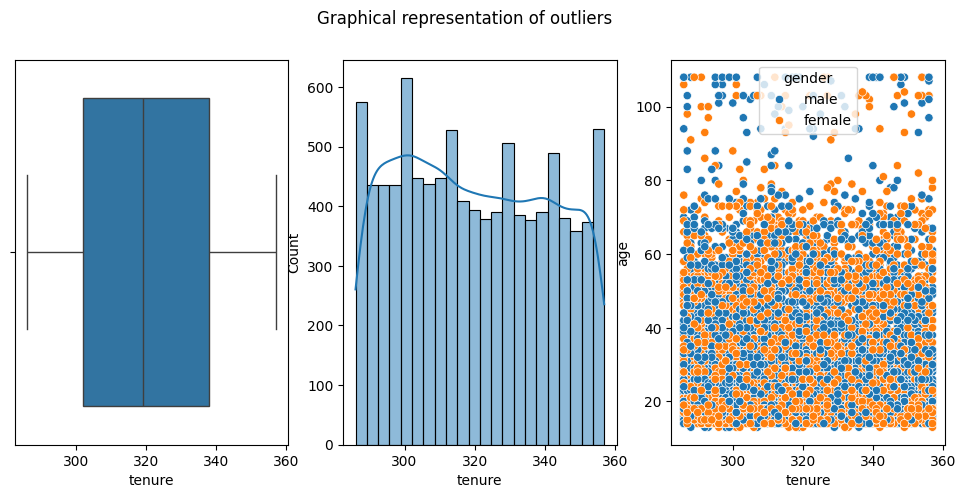

In [18]:
display_outliers(df,"tenure","age","gender")

### Summarising DataFrames 
#### Groupby

In [19]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
73,1820036,15,25,1998,1,male,340.0,0,0,0,0,0,0,0,0
74,1922550,15,3,1998,1,male,338.0,0,0,0,0,0,0,0,0
81,2162779,15,19,1998,2,male,316.0,0,0,0,0,0,0,0,0
94,1129704,15,2,1998,5,male,347.0,0,0,0,0,0,0,0,0
117,1885663,16,16,1997,1,female,332.0,0,0,0,0,0,0,0,0


In [35]:
data_grouped_by_age = df.groupby(["age"],as_index=False)["userid"].count()
data_grouped_by_age.rename(columns={"userid":"Age_Count"},inplace=True) 

data_grouped_by_age.head()

,age,Age_Count
0,13,25
1,14,271
2,15,353
3,16,357
4,17,370


In [38]:
data_grouped_by_age_and_gender = data_grouped_by_age = df.groupby(["gender"],as_index=False)["userid"].count() 
data_grouped_by_age_and_gender.head() 

,gender,userid
0,female,3782
1,male,5935


In [ ]:
# friend - count by gender - average likes - total fiends

calculations = {
    
   total_friend = ("friend_count",sum),
   average_likes = ("likes",np.mean),
   min_tenure = ("tenure",min)
    "friendships_initiated":[min,max,np.mean]
}

df.groupby(["gender"]).agg(calculations)



C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3344917745.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(["gender"]).agg(
C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3344917745.py:5: FutureWarning: The provided callable <function mean at 0x0000020FDD966CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["gender"]).agg(
C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3344917745.py:5: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instea

,total_friend,average_likes,min_tenure,max_tenure,avg_friends_initiated
gender,,,,,
female,746193,230.334215,286.0,357.0,98.850608
male,807268,83.302949,286.0,357.0,89.091660


In [63]:
def summation(*args): 
    
    print(args[0])

summation(1,2,3)

1


In [66]:
def data_summary(**kwargs): 
    
    
    new_group = kwargs["df"].groupby(kwargs["grouper"]).agg(kwargs["agg"])
    
    return new_group


params = data_summary(grouper = ["gender"],agg = {"friendships_initiated":[min,max,np.mean]},df=df)

params


C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\1338216091.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  new_group = kwargs["df"].groupby(kwargs["grouper"]).agg(kwargs["agg"])
C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\1338216091.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  new_group = kwargs["df"].groupby(kwargs["grouper"]).agg(kwargs["agg"])
C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\1338216091.py:4: FutureWarning: The provided callable <function mean at 0x0000020FDD966CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided 

friendships_initiated                 
                         min   max       mean
gender                                       
female                     0  1618  98.850608
male                       0  2168  89.091660

In [77]:
pivot_table_by_gender = pd.pivot_table(df,index=['gender'],aggfunc={"likes":np.mean,"friendships_initiated":np.mean})
pivot_table_by_gender

C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3705876391.py:1: FutureWarning: The provided callable <function mean at 0x0000020FDD966CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_by_gender = pd.pivot_table(df,index=['gender'],aggfunc={"likes":np.mean,"friendships_initiated":np.mean})
C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3705876391.py:1: FutureWarning: The provided callable <function mean at 0x0000020FDD966CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_by_gender = pd.pivot_table(df,index=['gender'],aggfunc={"likes":np.mean,"friendships_initiated":np.mean})


,friendships_initiated,likes
gender,,
female,98.850608,230.334215
male,89.091660,83.302949


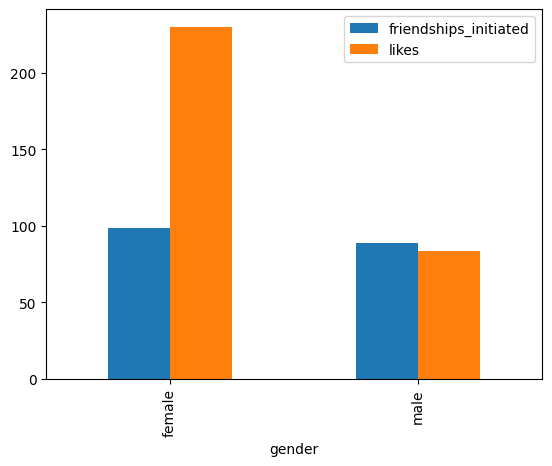

In [80]:
pivot_table_by_gender.plot(kind="bar")
plt.savefig("pivot.png")

In [84]:
pivot_table_by_gender = pd.pivot_table(df,index=['age'],columns=["gender"],aggfunc={"likes":np.mean,"friendships_initiated":np.mean})
pivot_table_by_gender

C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3888828027.py:1: FutureWarning: The provided callable <function mean at 0x0000020FDD966CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_by_gender = pd.pivot_table(df,index=['age'],columns=["gender"],aggfunc={"likes":np.mean,"friendships_initiated":np.mean})
C:\Users\EliteBook 800 G4\AppData\Local\Temp\ipykernel_14404\3888828027.py:1: FutureWarning: The provided callable <function mean at 0x0000020FDD966CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_by_gender = pd.pivot_table(df,index=['age'],columns=["gender"],aggfunc={"likes":np.mean,"friendships_initiated":np.mean})


friendships_initiated                   likes             
gender                female        male      female         male
age                                                              
13                202.928571  127.454545  305.500000   441.363636
14                217.564885  139.492857  402.000000    91.557143
15                178.367089  126.189744  253.379747    97.307692
16                191.054264  138.342105  307.984496    84.885965
17                185.449612  140.016598  453.178295   124.975104
..                       ...         ...         ...          ...
103                87.928571  154.133333  109.714286    28.400000
104               335.000000         NaN   80.000000          NaN
106                42.500000  115.750000   13.500000   144.000000
107                      NaN  252.500000         NaN  3149.000000
108                86.100000  181.333333   52.200000   114.809524

[92 rows x 4 columns]

### Reshaping DataFrames

#### 1.Stack Method 
- The stack() method works with the MultiIndex objects in DataFrame, it returns a DataFrame with an index with a new inner-most level of row labels. It changes the wide table to a long table.
- making the DataFrame taller and narrower (more rows, fewer columns).

In [33]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [32]:
stacked_df = df.stack()

stacked_df.head(30)

0  userid                   2094382
   age                           14
   dob_day                       19
   dob_year                    1999
   dob_month                     11
   gender                      male
   tenure                     266.0
   friend_count                   0
   friendships_initiated          0
   likes                          0
   likes_received                 0
   mobile_likes                   0
   mobile_likes_received          0
   www_likes                      0
   www_likes_received             0
1  userid                   1192601
   age                           14
   dob_day                        2
   dob_year                    1999
   dob_month                     11
   gender                    female
   tenure                       6.0
   friend_count                   0
   friendships_initiated          0
   likes                          0
   likes_received                 0
   mobile_likes                   0
   mobile_likes_received    

In [35]:
stacked_df.to_csv("restructured.csv")

### 2. Unstack Method

- performs the inverse operation of stack(). It pivots a level of the (possibly hierarchical) row index into the column axis, producing a wider and shorter DataFrame. This is useful for unstacking grouped or aggregated data.
- Converts a level of index into DataFrame columns, making the DataFrame shorter and wider (fewer rows, more columns).



In [37]:
unstacked_df = stacked_df.unstack()
unstacked_df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


### 3. Melt
- This function is used to transform a DataFrame from a wide format to a long format. It can be seen as ‘unpivoting’ a DataFrame, turning columns into rows.
-The melt() function in pandas transforms a DataFrame from a wide format to a long format. The id_vars specify columns to use as identifier variables, while value_vars specify columns to unpivot. If value_vars is not specified, all non-id_vars will be unpivoted.

In [4]:
data = {
    
    "products":["a","b","c","d"],
    "shop 1":[3,6,7,8],
    "shop 2":[2,7,17,8],
    "shop 3":[13,16,17,18],
}

DF_ = pd.DataFrame(data)

DF_

,products,shop 1,shop 2,shop 3
0,a,3,2,13
1,b,6,7,16
2,c,7,17,17
3,d,8,8,18


In [6]:
DF_MELT = pd.melt(DF_,id_vars = 'products',value_vars=['shop 1','shop 2','shop 3'],var_name="Shops")

DF_MELT

,products,Shops,value
0,a,shop 1,3
1,b,shop 1,6
2,c,shop 1,7
3,d,shop 1,8
4,a,shop 2,2
5,b,shop 2,7
6,c,shop 2,17
7,d,shop 2,8
8,a,shop 3,13
9,b,shop 3,16


In [48]:
DF_UNMELTED = DF_MELT.pivot(index = "products",columns="Attribute")

DF_UNMELTED

value              
Attribute shop 1 shop 2 shop 3
products                      
a              3      2     13
b              6      7     16
c              7     17     17
d              8      8     18

### Data Transformations Methods

#### 1. Normalisations & Standardization 

- Normalization:
The main objective of normalization is to rescale the features to a standard range of values which is usually 0-1. Normalization is usually used when different features have different range of values and some feature might contribute more to the model learning process, normalization helps in equalizing the range of the features and makes sure that the features contribute equally to the learning algorithm.


- Standardardization is also known as z-score normalization, the objective of standardization is to transform the feature such that the value of mean becomes 0 and the value of standard deviation becomes 1. Standardization is usually useful when features have different scales but follow normal distribution, it helps machine learning algorithms which relies on gradient based optimization to converge at a faster rate.

In [15]:
age_arr = np.array(df["age"])
normalised_arr_age = sk.preprocessing.normalize([age_arr])
df["age_normalised"] =  normalised_arr_age.reshape(-1)

df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_normalised
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.001021
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0.001021
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0.001021
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0.001021
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0.001021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,0.004958
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,0.001312
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,0.001094
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,0.001677


In [29]:
age_arr

array([14, 14, 14, ..., 15, 23, 39], shape=(99003,))

In [65]:
normalised_arr_age.reshape(-1)

array([0.00102074, 0.00102074, 0.00102074, ..., 0.00109365, 0.00167693,
       0.00284349], shape=(99003,))

#### 2.Encoding Categorical Variable

- One-Hot Encoding:
One-Hot Encoding is the most common encoding techniques used in data transformation, what it does is that it converts each category in a categorical feature into a different binary feature(i.e. 0 or 1), for example if there is a feature called 'vehicle' in the dataset and the categories in it are 'car', 'bike', 'bicycle', one-hot encoding will create three separate columns as 'is_car', 'is_bike', 'is_bicycle' and then label them as 0 if absent or 1 if present.
- Label Encoding:
Label Encoding on the other hand assigns a unique numeric value to different categories in the same feature, for example if there is a feature called size and it contains three values - 'small', 'medium', 'large', then the label encoding could label each value as 0, 1, 2 respectively.
- Ordinal Encoding:
It is quite similar to label encoding except the fact that in ordinal encoding the categorical feature is encoded according to some sort of hierarchy in the system, For example if there are three categories in the categorical feature named - "High-School", "Bachelor's", and "Master's" the ordinal encoding will label this as 0, 1, 2 based on the educational hierarchy.

In [72]:
def label_encoding(data):
    
    category_label = {} 
    
    unique_values  = [val for val in data.unique()]
    
    no_categories = len(unique_values)
    
    for i in range(no_categories):
        
        category_label[unique_values[i]] = i
        
    return category_label
        
        
label_encoding(df["gender"])

{'female': 0, 'male': 1}

In [94]:
def assign_value(data,col,new_col): 
    
    category_label = {} 
    
    unique_values  = [val for val in data[col].unique()]
    
    print(unique_values)
    
    no_categories = len(unique_values)
    
    for i in range(no_categories):
        
        category_label[unique_values[i]] = i
        
    
    new_values = []
    
    for i in data[col]:
        
        for key,val in category_label.items():
            

            if i == key:
            
                 i = category_label[key] 
                 
                 new_values.append(i)
     
    data[new_col]   = new_values
        
    return data
assign_value(df,"gender","encoded_gender")
                  


['female', 'male']


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_standardized,gender_labels,encoded_gender
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,-0.377628,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,-0.377628,1,1
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,-0.377628,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,-0.377628,1,1
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0,-0.377628,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1056469,15,19,1998,5,female,56.0,0,0,0,0,0,0,0,0,0.840526,0,0
97,2190921,15,17,1998,5,male,21.0,0,0,0,0,0,0,0,0,0.840526,1,1
98,1496299,15,30,1998,6,male,63.0,0,0,0,0,0,0,0,0,0.840526,1,1
99,1297545,15,14,1998,6,female,27.0,0,0,0,0,0,0,0,0,0.840526,0,0


In [95]:
df = df.drop("gender_labels",axis=1)
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_standardized,encoded_gender
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,-0.377628,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,-0.377628,1
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,-0.377628,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,-0.377628,1
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0,-0.377628,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1056469,15,19,1998,5,female,56.0,0,0,0,0,0,0,0,0,0.840526,0
97,2190921,15,17,1998,5,male,21.0,0,0,0,0,0,0,0,0,0.840526,1
98,1496299,15,30,1998,6,male,63.0,0,0,0,0,0,0,0,0,0.840526,1
99,1297545,15,14,1998,6,female,27.0,0,0,0,0,0,0,0,0,0.840526,0


In [106]:
# One Hot Encoding 
one_hot_ecoded_gender = pd.get_dummies(df,columns=["gender"],dtype=int)

one_hot_ecoded_gender

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_standardized,encoded_gender,gender_female,gender_male
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,-0.377628,0,1,0
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,-0.377628,1,0,1
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0,-0.377628,0,1,0
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0,-0.377628,1,0,1
5,1524765,14,1,1999,12,15.0,0,0,0,0,0,0,0,0,-0.377628,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1056469,15,19,1998,5,56.0,0,0,0,0,0,0,0,0,0.840526,0,1,0
97,2190921,15,17,1998,5,21.0,0,0,0,0,0,0,0,0,0.840526,1,0,1
98,1496299,15,30,1998,6,63.0,0,0,0,0,0,0,0,0,0.840526,1,0,1
99,1297545,15,14,1998,6,27.0,0,0,0,0,0,0,0,0,0.840526,0,1,0


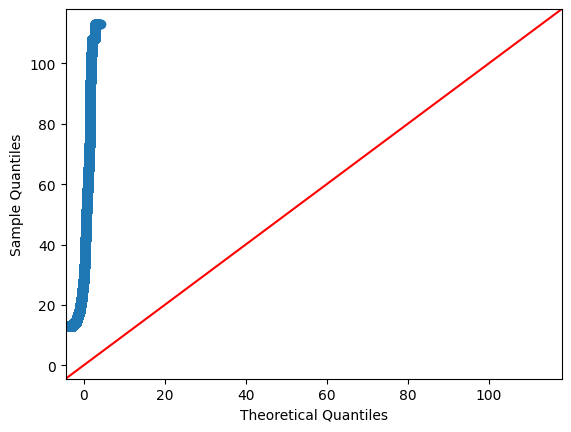

In [ ]:
df = df.loc[1:100,[""]]
def test_norm(data):
    fig = sm.qqplot(data,line='45')

    plt.show()
    
test_norm(df["age"])

In [65]:
df_iloc = df.loc[(df["age"]>= 15) & (df["age"]<20),]

df_iloc

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
23,1708962,15,17,1998,11,male,98.0,0,0,0,0,0,0,0,0
24,1098955,15,3,1998,11,male,100.0,0,0,0,0,0,0,0,0
25,1001243,15,11,1998,11,male,28.0,0,0,0,0,0,0,0,0
26,2113084,15,24,1998,11,male,52.0,0,0,0,0,0,0,0,0
27,2163454,15,15,1998,11,male,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98991,1099760,15,29,1998,12,female,546.0,3712,482,6285,9515,5575,7780,710,1735
98992,1422393,19,27,1994,11,female,456.0,3850,1311,4151,17117,3981,9370,170,7747
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820


In [63]:
df[(df["tenure"]>= 1) & (df["tenure"]<20)]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
15,1751722,13,7,2000,4,female,16.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95793,1682244,14,29,1999,12,female,16.0,847,558,737,1197,386,298,351,899
95803,2008961,13,9,2000,2,female,15.0,869,569,825,3228,119,1638,706,1590
96613,1146847,19,16,1994,8,female,15.0,1038,264,380,671,366,481,14,190
96732,1884941,32,3,1981,6,male,13.0,1039,902,708,400,618,396,90,4


In [52]:
df_loc = df.loc[1:100,df.columns[5:10]]
df_loc

,gender,tenure,friend_count,friendships_initiated,likes
1,female,6.0,0,0,0
2,male,13.0,0,0,0
3,female,93.0,0,0,0
4,male,82.0,0,0,0
5,male,15.0,0,0,0
...,...,...,...,...,...
96,female,56.0,0,0,0
97,male,21.0,0,0,0
98,male,63.0,0,0,0
99,female,27.0,0,0,0


In [70]:

df = df.loc[1:100,]

standardizer = sk.preprocessing.StandardScaler()

age_standardized = standardizer.fit_transform([df["age"]])

df["age_standardized"] = zScore(df,"age").calc_zScore()

df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_standardized
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,-0.377628
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,-0.377628
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,-0.377628
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,-0.377628
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0,-0.377628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1056469,15,19,1998,5,female,56.0,0,0,0,0,0,0,0,0,0.840526
97,2190921,15,17,1998,5,male,21.0,0,0,0,0,0,0,0,0,0.840526
98,1496299,15,30,1998,6,male,63.0,0,0,0,0,0,0,0,0,0.840526
99,1297545,15,14,1998,6,female,27.0,0,0,0,0,0,0,0,0,0.840526


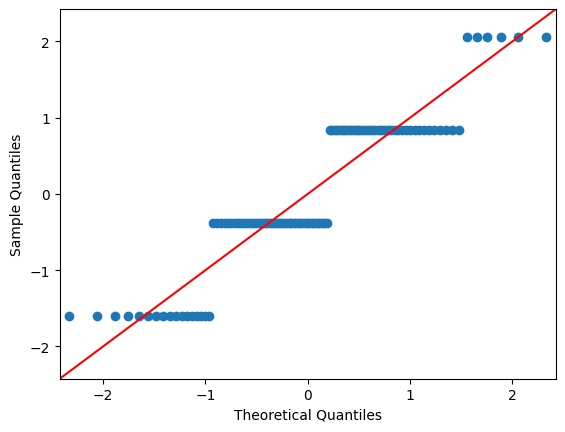

In [71]:
test_norm(df["age_standardized"])

In [69]:
class zScore:
    
    def __init__(self,df,col):
        
        self.df = df
        self.col = col 
        
    def get_len(self): 
        
        return len(self.df[self.col])
        
    def calc_mean(self):
        
        n = self.get_len()
        total_x = self.df[self.col].sum()
        x_ = total_x/n
        
        return x_
    
    def calc_SD(self):
        
        
        upper_part = 0
        
        upper_part = sum([(val-self.calc_mean())**2 for val in self.df[self.col]])
        
            
        SD = np.sqrt(upper_part/self.get_len())
        
        return SD
    
    def calc_zScore(self):
        
        z_scores = [(val-self.calc_mean())/self.calc_SD() for val in self.df[self.col]]
        
        return z_scores
        

df = df.loc[1:100,]   
        
z = zScore(df,"tenure") 



In [40]:
z.calc_zScore()

[np.float64(-0.7226315981416498),
 np.float64(-0.6684960974247025),
 np.float64(-0.04980466065959143),
 np.float64(-0.1348747332147942),
 np.float64(-0.6530288115055748),
 np.float64(-0.6762297403842664),
 np.float64(-0.769033455899033),
 np.float64(-0.1426083761743581),
 np.float64(0.5534194901863919),
 np.float64(-0.011136445861771982),
 np.float64(-0.3436830931230192),
 np.float64(0.05073269781473913),
 np.float64(-0.2972812353656359),
 np.float64(-0.769033455899033),
 np.float64(-0.6452951685460109),
 np.float64(-0.5060895952738609),
 np.float64(-0.5756923819099359),
 np.float64(-0.7380988840607775),
 np.float64(-0.699430669262958),
 np.float64(-0.699430669262958),
 np.float64(-0.6916970263033942),
 np.float64(-0.769033455899033),
 np.float64(-0.011136445861771982),
 np.float64(0.004330840057355795),
 np.float64(-0.5524914530312443),
 np.float64(-0.3668840220017109),
 np.float64(-0.769033455899033),
 np.float64(-0.5834260248694998),
 np.float64(-0.45195409455691365),
 np.float64(-0

#### 3. Dimensionality Reduction 

- Principal Component Analysis(PCA)
PCA is the most common dimensionality reduction technique used in machine learning which transforms higher dimension data into lower dimension data retaining the information of the original dataset. PCA deals with the generation of principal components through standardization of data, finding covariance matrix of the data and then arranging the eigenvector obtained from the covariance matrix according to eigen values in descending order. In PCA the original data is projected onto the principal components to obtain lower dimensional data.

In [34]:
age_arr

array([14, 14, 14, ..., 15, 23, 39], shape=(99003,))